In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

from random import randint

In [58]:
def prepareData(range1=1000, range2=50):
    samples = []
    labels = []
    # 5% got the side effect amongst 13-64 
    # 5% did not get the dise effect amonsgt 65-100
    for i in range(range2):
        age = randint(13,64)
        samples.append(age)
        labels.append(1)

        age = randint(65,100)
        samples.append(age)
        labels.append(0)

    for i in range(range1):
        age = randint(13,64)
        samples.append(age)
        labels.append(0)

        age = randint(65,100)
        samples.append(age)
        labels.append(1)

    return samples, labels

train_samples, train_labels = prepareData(range1=1000, range2=50)
test_samples, test_labels = prepareData(range1=200, range2=10)


In [59]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)


In [60]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create scaler: scaler 
scaler = MinMaxScaler()
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))



In [61]:
# import shuffle
from sklearn.utils import shuffle

scaled_train_samples, train_labels = shuffle(scaled_train_samples, train_labels)
scaled_test_samples, test_labels = shuffle(scaled_test_samples, test_labels)



In [62]:
#implement Sequenctial model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [63]:
from keras.layers import Dense
from keras.models import Sequential
model = Sequential(
    [ 
    Dense(32, input_shape=(1,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
    ]
)

In [64]:
# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________


In [65]:
# compile the model
adamOptimizer = Adam(learning_rate=1e-4)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adamOptimizer, metrics=['accuracy'])


In [66]:
model.fit(scaled_train_samples, train_labels, epochs=30, batch_size=10, validation_split=0.1, shuffle=True)

Epoch 1/30
189/189 [==============================] - 1s 2ms/step - loss: 0.6372 - accuracy: 0.5831 - val_loss: 0.6380 - val_accuracy: 0.5714
Epoch 2/30
189/189 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6587 - val_loss: 0.6094 - val_accuracy: 0.6571
Epoch 3/30
189/189 [==============================] - 0s 1ms/step - loss: 0.5790 - accuracy: 0.7413 - val_loss: 0.5803 - val_accuracy: 0.7238
Epoch 4/30
189/189 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7820 - val_loss: 0.5505 - val_accuracy: 0.7714
Epoch 5/30
189/189 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.8143 - val_loss: 0.5201 - val_accuracy: 0.8048
Epoch 6/30
189/189 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.8386 - val_loss: 0.4904 - val_accuracy: 0.8238
Epoch 7/30
189/189 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8524 - val_loss: 0.4597 - val_accuracy: 0.8524
Epoch 

In [67]:
assert model.history.history.get('accuracy')[-1]>=0.90
assert model.history.history.get('val_accuracy')[-1]>=0.89

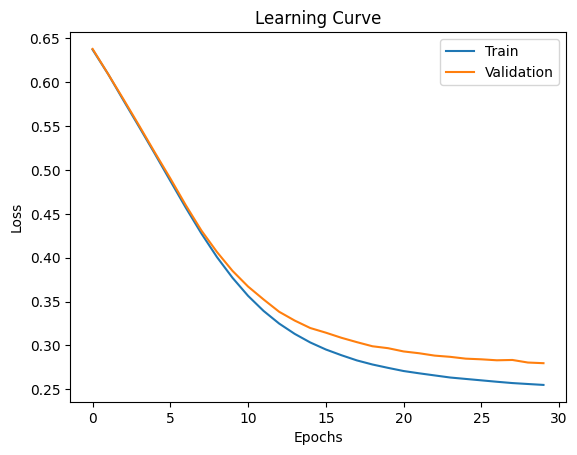

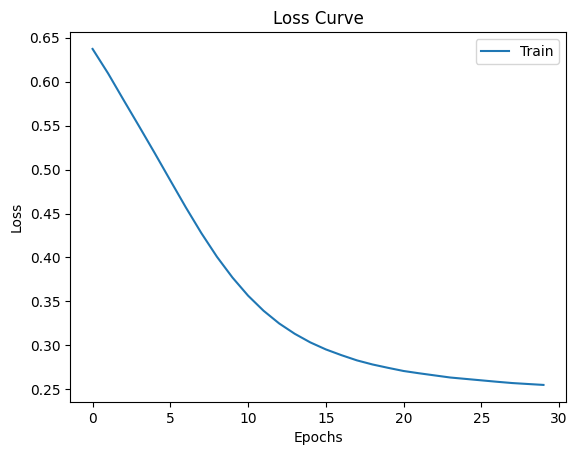

In [69]:
from utils import plot_learning_curve, plot_loss_curve, compute_metrics
plot_learning_curve(model.history)
plot_loss_curve(model.history)

# Preprocess Test Data

In [70]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [71]:
predictions = model.predict(scaled_test_samples)
predictions = np.argmax(predictions, axis=-1)
print(predictions)


14/14 [==============================] - 0s 2ms/step
[0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0
 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 1 1 0 0]


In [72]:
#plot confustion matrix

from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(test_labels, predictions)
cm

array([[190,  20],
       [ 10, 200]], dtype=int64)

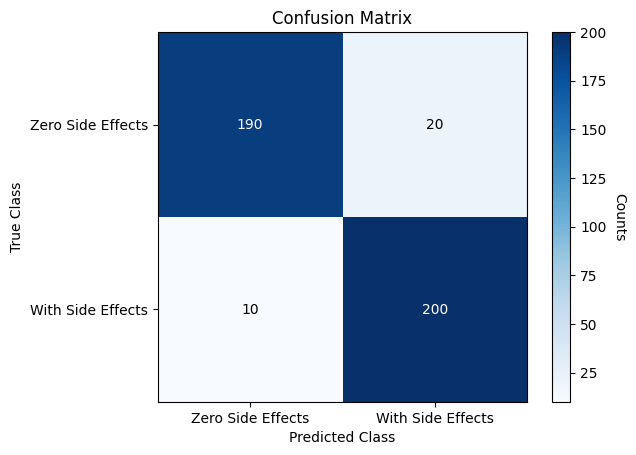

In [73]:
cm_plot_labels = ["Zero Side Effects", "With Side Effects"]
from utils import plot_confusion_matrix, plot_learning_curve, plot_loss_curve

plot_confusion_matrix(cm, classes=cm_plot_labels)

In [78]:
compute_metrics(cm)

Accuracy: 0.9285714285714286
Sensitivity: 0.95
Specificity: 0.9090909090909091
Precision: 0.9047619047619048
Recall: 0.95
F1 Score: 0.9268292682926829


(0.9285714285714286,
 0.95,
 0.9090909090909091,
 0.9047619047619048,
 0.95,
 0.9268292682926829)

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________


Save the model

In [81]:
# save modeel to a file
import os.path
if os.path.isfile('models/medical_train_model.h5') is False:
    model.save('models/medical_train_model.h5')


In [82]:
# load the model
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_train_model.h5')
new_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________


In [84]:
new_model.optimizer

model to jason

In [86]:
# model to jason
json_string = model.to_json()
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_9_input"}}, {"class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_10", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [87]:
# model from jason
from tensorflow.keras.models import model_from_json
model = model_from_json(json_string)
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________


In [90]:
import os
MODEL_DIR = 'models'
# save model weights
def save_model(model, model_name):
    model_path = os.path.join(MODEL_DIR, model_name)
    if not os.path.exists(model_path):
        model.save_weights(model_path)

save_model(model,  'model_weights.h5')
